In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


path='C:\ML\Compute Tasks\Task 2\dataset_task2.csv'

df=pd.read_csv(path)

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [513]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [515]:
unique_values_series=df.apply(lambda x: x.unique())
print(unique_values_series)

CustomerID                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                       [Male, Female]
Age                       [19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...
Annual Income (k$)        [15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...
Spending Score (1-100)    [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...
dtype: object


Finding null values

In [516]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Encoding and splitting the dataset

In [517]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

ode=OrdinalEncoder(categories=[['Female','Male']])
df['Gender']=ode.fit_transform(df[['Gender']])
df=df.drop(columns=['CustomerID'])
df=df.reset_index(drop=True)

X_train,X_test=train_test_split(df,random_state=42,test_size=0.2)
X_train = X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40


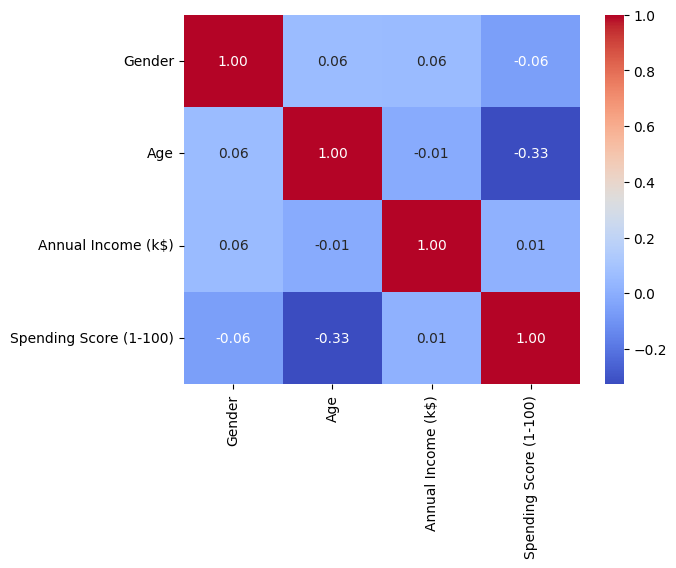

In [518]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',xticklabels=df.columns,yticklabels=df.columns)
plt.show()

We need to do scaling before doing PCA

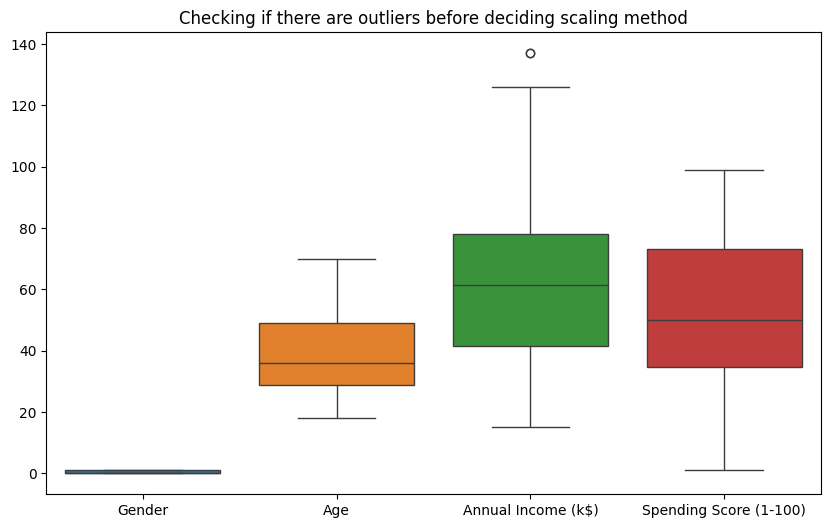

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [519]:

plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.title('Checking if there are outliers before deciding scaling method')
plt.show()
print(df.columns)

Checking skewness of variables

In [520]:
X_train.skew()

Gender                    0.280271
Age                       0.492257
Annual Income (k$)        0.375291
Spending Score (1-100)   -0.089506
dtype: float64

Since there is a outlier ,we will use robust scaler

In [521]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
train_scaled_data=scaler.fit_transform(X_train[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
train_scaled_df=pd.DataFrame(train_scaled_data,columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
X_train_scaled=pd.concat([X_train['Gender'],train_scaled_df],axis=1)

test_scaled_data=scaler.transform(X_test[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
test_scaled_df=pd.DataFrame(test_scaled_data,columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
X_test_scaled=pd.concat([X_test['Gender'],test_scaled_df],axis=1)

X_test_scaled
X_train_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.65,-0.209150,-0.222222
1,1.0,-0.20,1.673203,0.614379
2,0.0,0.00,-0.653595,-0.640523
3,0.0,0.90,-0.888889,-0.954248
4,0.0,0.20,0.183007,0.196078
...,...,...,...,...
155,0.0,1.50,0.026144,-0.013072
156,1.0,0.05,-1.098039,-0.980392
157,1.0,0.60,-0.052288,-0.039216
158,1.0,-0.05,0.810458,1.032680


Doing PCA on Scaled DataFrame,reducing number of dimensions to 2

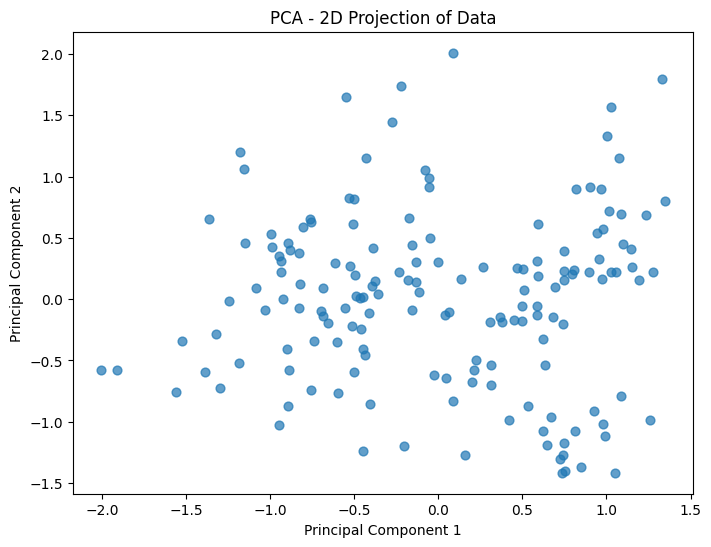

array([0.36965885, 0.29664305])

In [522]:
from sklearn.decomposition import PCA

pca_2d=PCA(n_components=2)
Xtrain_after_pca_2d=pca_2d.fit_transform(X_train_scaled)
Xtest_after_pca_2d=pca_2d.transform(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(Xtrain_after_pca_2d[:, 0], Xtrain_after_pca_2d[:, 1], s=40, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection of Data')
plt.show()

pca_2d.explained_variance_ratio_

Doing PCA on Scaled DataFrame,reducing number of dimensions to 3

Text(0.5, 0.92, 'PCA - 3D Projection of Data')

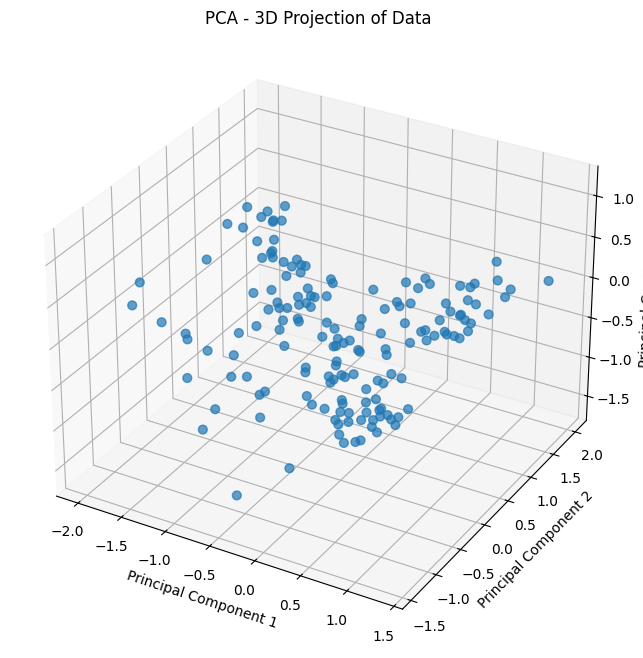

In [523]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


pca_3d=PCA(n_components=3)
Xtrain_after_pca_3d=pca_3d.fit_transform(X_train_scaled)
Xtest_after_pca_3d=pca_3d.transform(X_test_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xtrain_after_pca_3d[:, 0], Xtrain_after_pca_3d[:, 1], Xtrain_after_pca_3d[:, 2], s=40, alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - 3D Projection of Data')

Using KMeans clustering

In [524]:
from sklearn.cluster import KMeans

Using elbow method to find value of K

In [525]:
import warnings
warnings.filterwarnings('ignore')

wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(Xtrain_after_pca_2d)
    wcss.append(kmeans.inertia_)

In [526]:
wcss

[181.89215653550963,
 102.74376296250799,
 66.94509482223901,
 48.995134640208136,
 39.989707414472115,
 31.933342831698972,
 27.418351981759717,
 23.494614964090673,
 19.29322575927043,
 17.181087980103563]

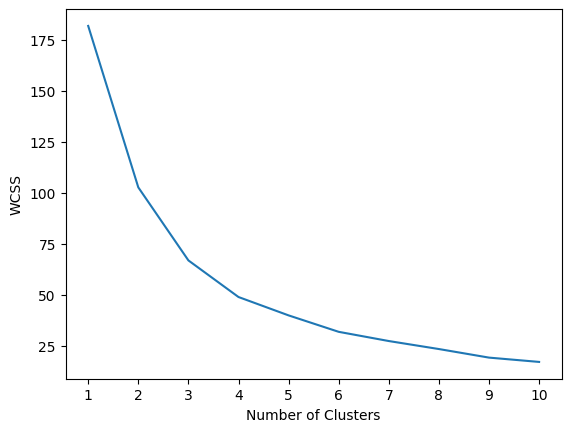

In [527]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Training Kmeans on train data

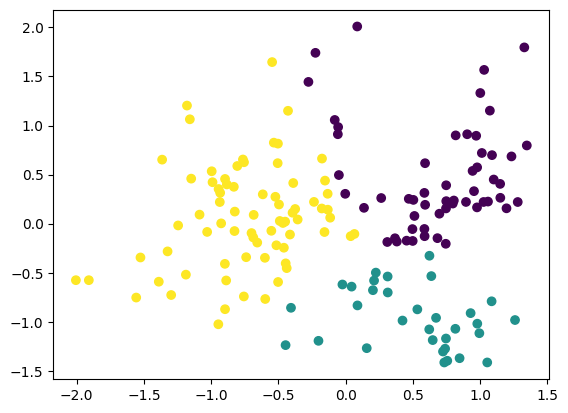

In [528]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_labels=kmeans.fit_predict(Xtrain_after_pca_2d)
plt.scatter(Xtrain_after_pca_2d[:, 0], Xtrain_after_pca_2d[:, 1], c=y_labels)

Testing Kmeans on test data

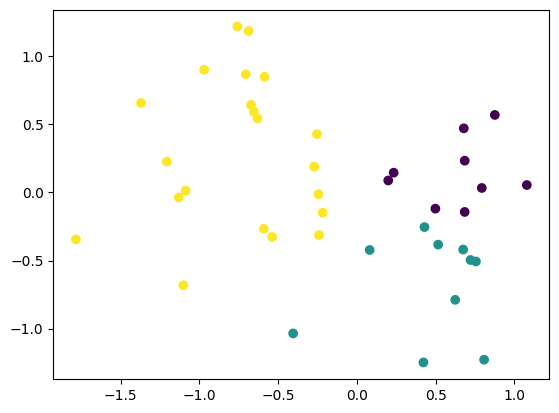

In [529]:
y_test_labels=kmeans.predict(Xtest_after_pca_2d)
plt.scatter(Xtest_after_pca_2d[:, 0], Xtest_after_pca_2d[:, 1], c=y_test_labels)

Using Hierarichal Clustering (Agglomerative Clustering) 

Text(0, 0.5, 'Eucledian Distance')

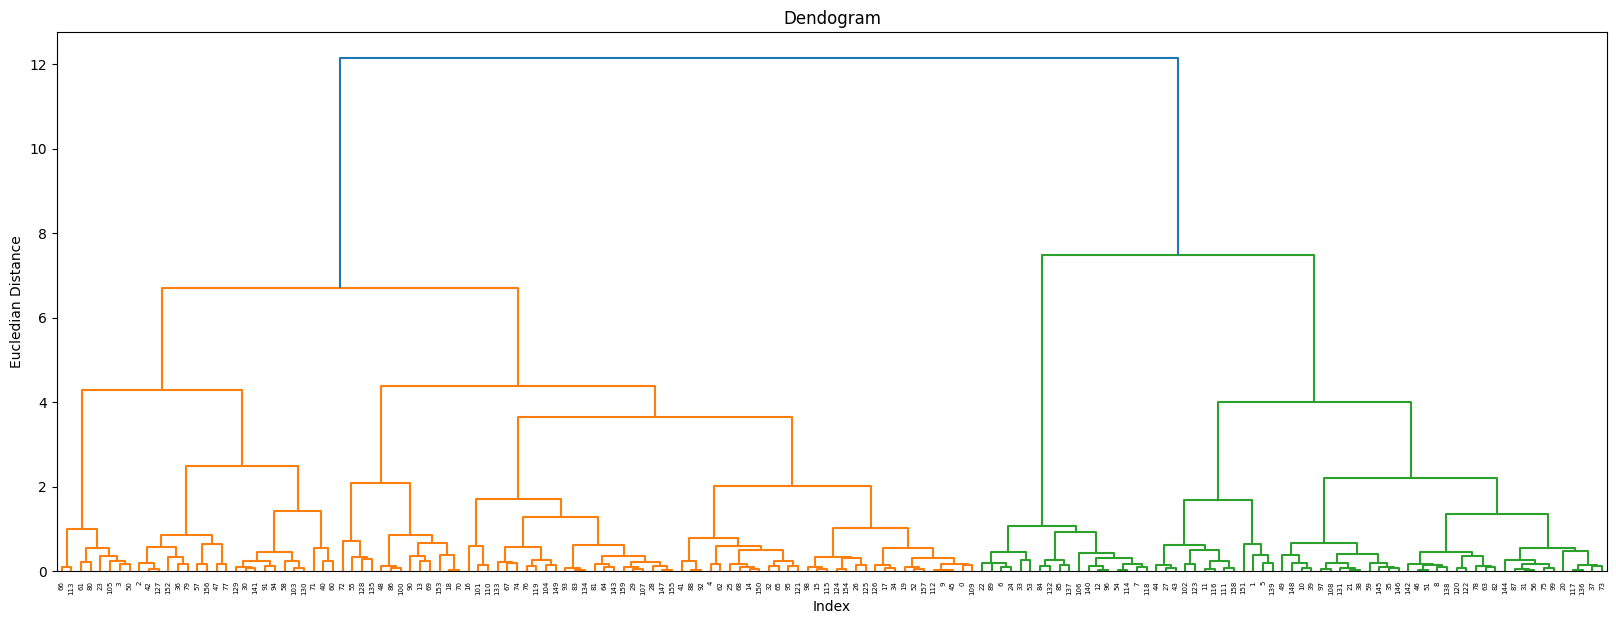

In [530]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
plt.title('Dendograms')

sc.dendrogram(sc.linkage(Xtrain_after_pca_2d,method='ward'))
plt.title('Dendogram')
plt.xlabel('Index')
plt.ylabel('Eucledian Distance')

In [531]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(Xtrain_after_pca_2d)
cluster.labels_

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1])

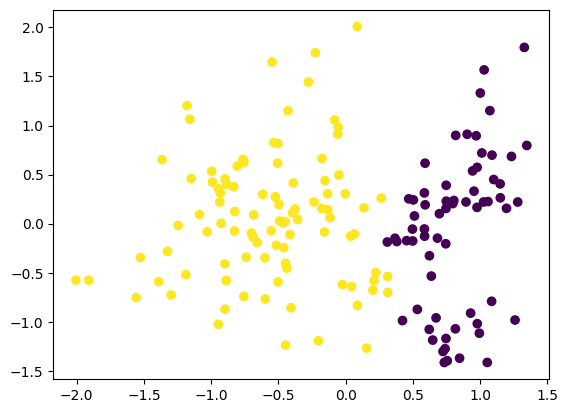

In [532]:
plt.scatter(Xtrain_after_pca_2d[:,0],Xtrain_after_pca_2d[:,1],c=cluster.labels_)